# Visualize the COVID trend in the US

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from helper import state_df, moving_avg

df = pd.read_csv('./United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
#look at brief information of the dataset
#print(df.head())
#print(df.shape)
#print(df.columns)
#print(df.isnull().sum())

In [2]:
# convert 'submission_date' data type to datetime 
df['submission_date'] = pd.to_datetime(df['submission_date'], format='%m/%d/%Y')
# select time, state, total cases, new cases, total death, new death as covid
# use total_ and new_ column will filter the variable with NA. This is for convenience as the variable containing NA such as
# the confirmed_, probable_ does not reflect the timing correctly either
covid=df[['submission_date','state','tot_cases', 'new_case', 'tot_death', 'new_death']]
#check if covid has missing value
#print(covid.isnull().sum())


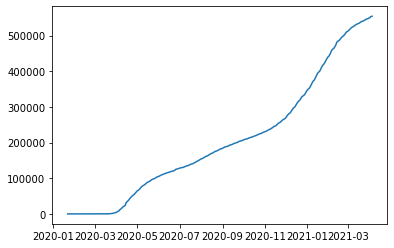

In [3]:
# group covid by state to get the total value for each day 
us_tot=covid.groupby(['submission_date']).sum()
plt.plot(us_tot.index, us_tot.tot_death)

In [4]:
#adjust the date as the days relative to the start (01/22/2020) for plot
days_since_begin = np.array([i for i in range(len(us_tot.index.values))]).reshape(-1,1)
days_since_begin.shape


(439, 1)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 <a list of 8 Text major ticklabel objects>)

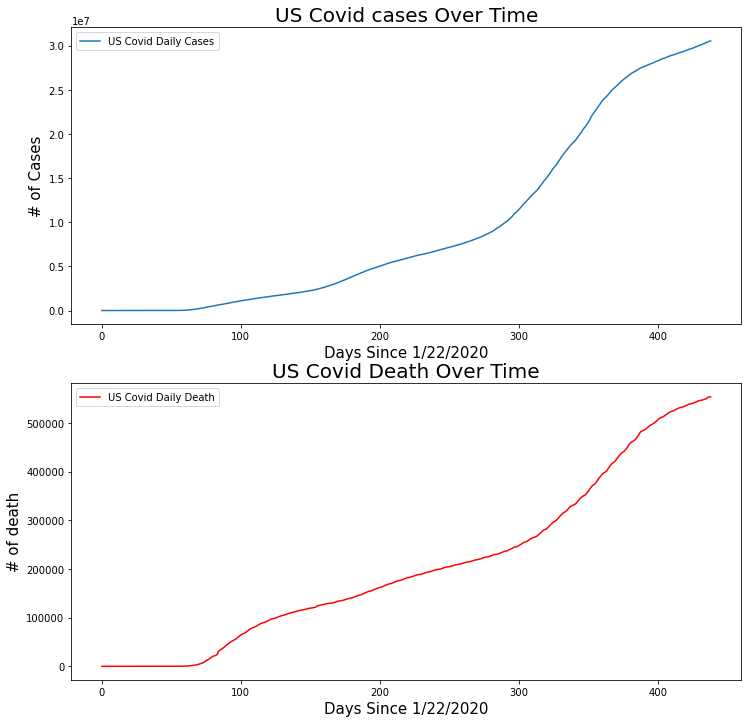

In [5]:
#plot the cumulative total cases and death related to covid in US in two subplots
plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.plot(days_since_begin, us_tot.tot_cases, label='US Covid Daily Cases')
plt.title('US Covid cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend()


plt.subplot(212)
plt.plot(days_since_begin, us_tot.tot_death, color='red', label='US Covid Daily Death')
plt.title('US Covid Death Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of death', size=15)
plt.legend()
plt.xticks(size=10)
plt.yticks(size=10)



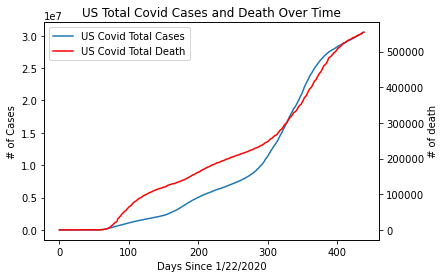

In [6]:
#plot the cumulative total cases and death related to covid in US in a single plot
fig, ax=plt.subplots()
ax.plot(days_since_begin, us_tot.tot_cases, label='US Covid Total Cases')
plt.title('US Total Covid Cases and Death Over Time', size=12)
ax.set_xlabel('Days Since 1/22/2020', size=10)
ax.set_ylabel('# of Cases', size=10)
ax.legend()

ax2=ax.twinx()
ax2.plot(days_since_begin, us_tot.tot_death, color='red', label='US Covid Total Death')
ax2.set_ylabel('# of death', size=10)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

ax.legend(lines, labels, loc=0)

plt.show()

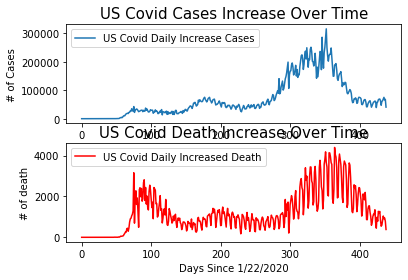

In [7]:
#plot the daily increased cases and death related to covid in US
plt.figure()
plt.subplot(211)
plt.plot(days_since_begin, us_tot.new_case)
plt.title('US Covid Cases Increase Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.legend(['US Covid Daily Increase Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)

plt.subplot(212)
plt.plot(days_since_begin, us_tot.new_death, color='red')
plt.title('US Covid Death Increase Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of death', size=10)
plt.legend(['US Covid Daily Increased Death'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

In [8]:
#Use moving average to smoothen the daily increase data
window=7   #14, 30
avg_new_death=moving_avg(us_tot.new_death.values, window)
avg_new_cases=moving_avg(us_tot.new_case.values, window)
avg_new_death2=moving_avg(us_tot.new_death.values, 14)
avg_new_cases2=moving_avg(us_tot.new_case.values, 14)
avg_new_death3=moving_avg(us_tot.new_death.values, 30)
avg_new_cases3=moving_avg(us_tot.new_case.values, 30)

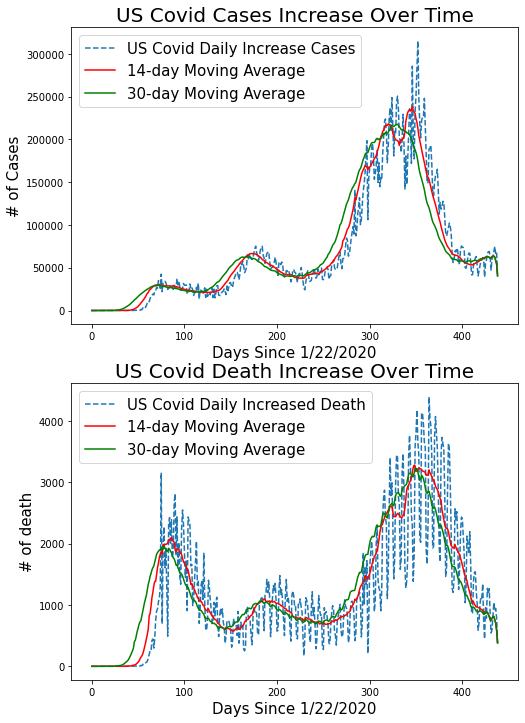

In [9]:
#plot the daily increased cases and death related to covid in US 
plt.figure(figsize=(8, 12))
plt.subplot(211)
plt.plot(days_since_begin, us_tot.new_case, '--')
plt.plot(days_since_begin, avg_new_cases2, 'r-')
plt.plot(days_since_begin, avg_new_cases3, 'g-')
plt.title('US Covid Cases Increase Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['US Covid Daily Increase Cases','14-day Moving Average','30-day Moving Average' ], prop={'size': 15})
plt.xticks(size=10)
plt.yticks(size=10)

plt.subplot(212)
plt.plot(days_since_begin, us_tot.new_death, '--')
plt.plot(days_since_begin, avg_new_death2, 'r-')
plt.plot(days_since_begin, avg_new_death3, 'g-')
plt.title('US Covid Death Increase Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of death', size=15)
plt.legend(['US Covid Daily Increased Death', '14-day Moving Average', '30-day Moving Average'], prop={'size': 15})
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

# Some Social Events Timeline
#### Restrictions: Late March
#### Black life matters protest: May30-August
#### Election: Nov
#### Vaccine: first in mid-Dec, more general in Jan